In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
filename = 'C:/Users/create/DV/mpg.csv'

In [3]:
mpg = pd.read_csv(filename, encoding='utf-8')

In [4]:
print(mpg.columns) 

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


In [5]:
print(mpg.head(10))

  manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0         audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2         audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3         audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4         audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5         audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6         audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7         audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8         audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9         audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   28  p   

     class  
0  compact  
1  compact  
2  compact  
3  compact  
4  compact  
5  compact  
6  compact  
7  compact  
8  compact  
9  compact  


In [6]:
print(mpg.describe())   # 간단한 통계정보

            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000
max      7.000000  2008.000000    8.000000   35.000000   44.000000


In [7]:
import seaborn as sns

In [8]:
displ = mpg['displ']    # displ: 엔진 크기

print('displ.unique') 
print(displ.unique)   # displ의 유니크값 출력

displ.unique
<bound method Series.unique of 0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
      ... 
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6
Name: displ, Length: 234, dtype: float64>


In [9]:
import numpy as np

print(np.max(displ.unique()))   # displ의 최댓값 출력
print(np.min(displ.unique()))    # displ의 최솟값 출력

7.0
1.6


In [10]:
plt.rc('font', family='Malgun Gothic')   # 폰트 꼭 설정

Text(0, 0.5, '값')

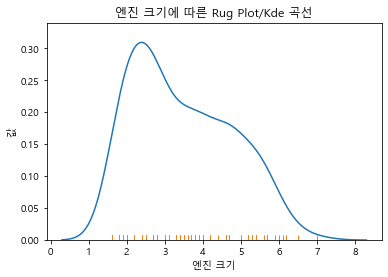

In [11]:
ax = plt.subplots()   # 같은 축 공유
sns.kdeplot(data=mpg, x="displ")   # kdeplot 그리기: 데이터는 mpg, x축은 엔진크기
ax = sns.rugplot(data=mpg, x="displ")  # rugplot 그리기: 데이터는 mpg, x축은 엔진크기

ax.set_title('엔진 크기에 따른 Rug Plot/Kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')

## 산점도와 Rug Plot(scatterplot)

Text(0, 0.5, '주행 마일수')

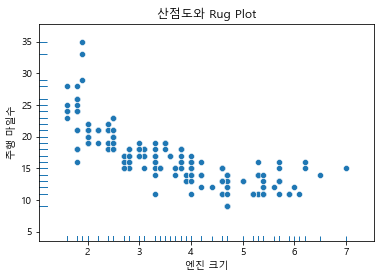

In [12]:
ax = plt.subplots()   # 축 그리기
sns.scatterplot(data=mpg, x='displ', y='cty')    # 산점도    x축은 엔진의 크기(displ), y축은 도시 주행 마일수('cty')
ax = sns.rugplot(data=mpg, x='displ', y='cty')   # 러그플롯
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일수')

  ## 엔진 크기 히스토그램(histplot)

Text(0, 0.5, '')

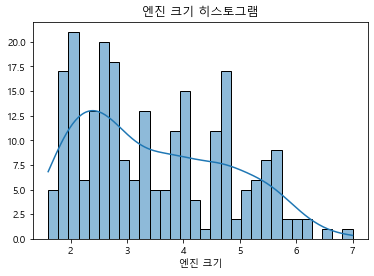

In [13]:
ax = plt.subplots()
ax = sns.histplot(data=mpg, x='displ', kde=True, bins=30)  # kde: 커널밀도 곡선, bins: 구간의 개수 
ax.set_title('엔진 크기 히스토그램')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('')

In [14]:
# drv컬럼 작업하기

In [15]:
mpg['drv']

0      f
1      f
2      f
3      f
4      f
      ..
229    f
230    f
231    f
232    f
233    f
Name: drv, Length: 234, dtype: object

In [16]:
print("mpg['drv'].unique()")
print(mpg['drv'].unique())

mpg['drv'].unique()
['f' '4' 'r']


In [17]:
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r': '후륜 구동'}

In [18]:
def setLabel(x):
    return label_dict[x]   # x에 해당되는 레이블 리턴

In [19]:
idx = 0   # 색상 구분을 위한 카운터 변수
mpg['drv'] = mpg['drv'].apply(setLabel)    # drv 컬럼에 setLabel 함수를 apply하여 다시 drv컬럼에 덮어씌우기 

In [20]:
print(mpg['drv'].unique())

['전륜 구동' '사륜 구동' '후륜 구동']


In [21]:
mpg['drv']   # drv컬럼 작업 완료

0      전륜 구동
1      전륜 구동
2      전륜 구동
3      전륜 구동
4      전륜 구동
       ...  
229    전륜 구동
230    전륜 구동
231    전륜 구동
232    전륜 구동
233    전륜 구동
Name: drv, Length: 234, dtype: object

In [52]:
# 구동 방식별 갯수
result = mpg.groupby('drv')['drv'].count()
print(result)

drv
사륜 구동    103
전륜 구동    106
후륜 구동     25
Name: drv, dtype: int64


Text(0, 0.5, '')

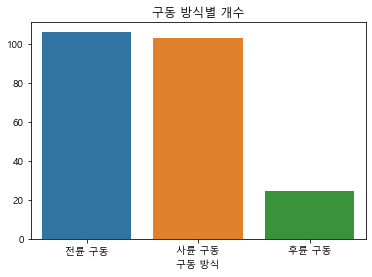

In [23]:
#구동 방식별 개수 구해보기
plt.figure()
ax = sns.countplot(x="drv", data=mpg)
ax.set_title('구동 방식별 개수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('')

In [24]:
print("mpg['cyl'].unique()")
print(mpg['cyl'].unique())

mpg['cyl'].unique()
[4 6 8 5]


In [25]:
print('실린더 개수')
result = mpg.groupby('cyl')['cyl'].count()
print(result)

실린더 개수
cyl
4    81
5     4
6    79
8    70
Name: cyl, dtype: int64


Text(0, 0.5, '')

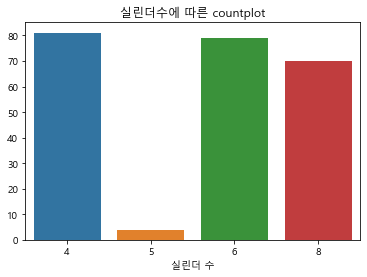

In [26]:
#실린더수에 따른 countplot
plt.figure()
ax = sns.countplot(x="cyl", data=mpg)
ax.set_title('실린더수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')

<Figure size 432x288 with 0 Axes>

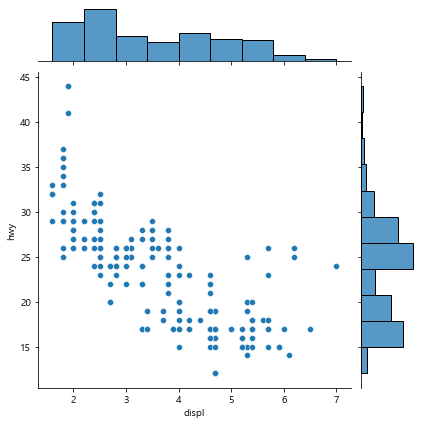

In [27]:
# 산점도와 히스토그램 동시 표현 (jointplot 이용)
plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg)  # x: 엔진크기, y: 주행 마일수

<Figure size 432x288 with 0 Axes>

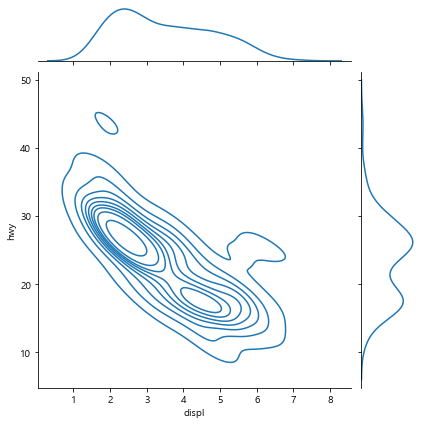

In [28]:
# 산점도와 히스토그램 동시 표현 (jointplot 이용)
plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg,kind="kde")  # kind="kde" : 데이터의 '밀집도'를 부드러운 선으로 확인

<Figure size 432x288 with 0 Axes>

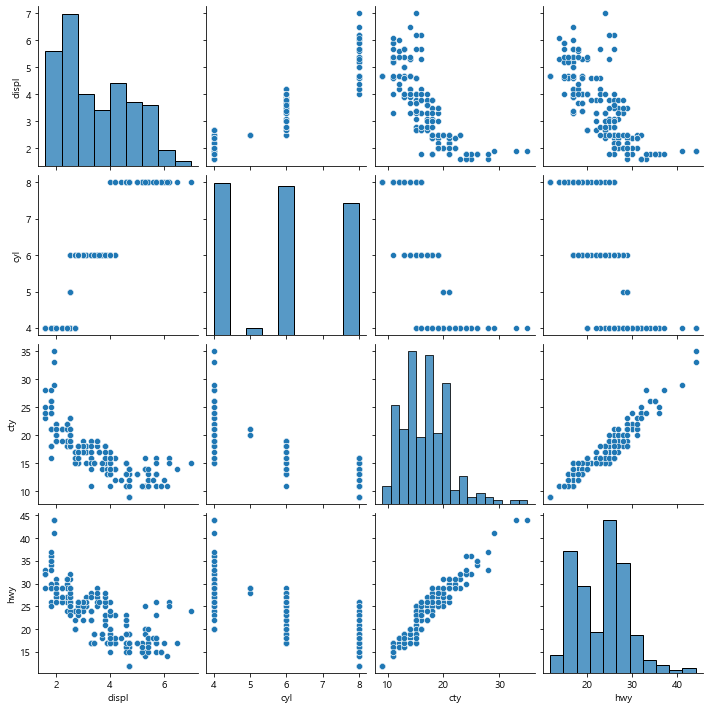

In [29]:
#pairplot 함수 사용하기  
plt.figure()
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]   # newmpg에 4개의 컬럼 저장
ax = sns.pairplot(data=newmpg)   # 데이터를 사용하여 pairplot 그리기

C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

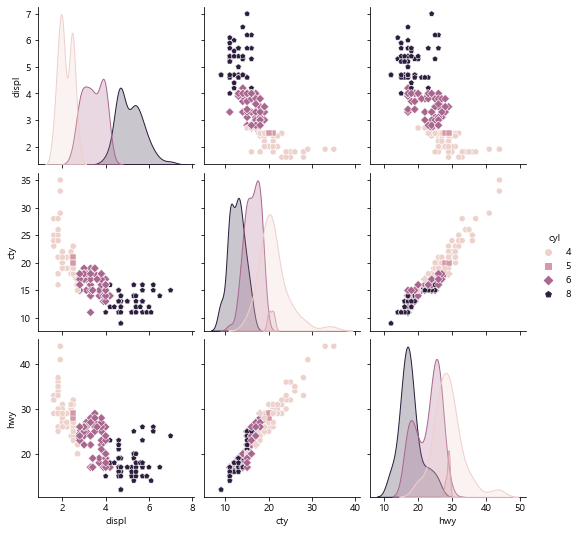

In [30]:
plt.figure()
ax = sns.pairplot(data=newmpg, hue="cyl", markers=["o", "s", "D", "p"])  # cyl: 실린더의 수,  markers: 마크 모양 지정
# 4가지 컬럼의 newmpg에서 cyl를 hue로 빼서 4x4가 아닌 3x3이 된다. 
# 실린더의 수는 4, 5, 6, 8  총  4개의 유니크 값을 갖는다.


mpg_size
cyl     4  5   6   8
drv                 
사륜 구동  23  0  32  48
전륜 구동  58  4  43   1
후륜 구동   0  0   4  21


Text(33.1875, 0.5, '구동 방식')

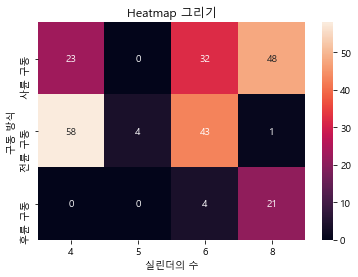

In [31]:
# 히트맵 사용하기
mpg_size = mpg.pivot_table(   # 1D -> 2D 로 데이터 형태 변경
    index="drv", columns="cyl", aggfunc="size", fill_value=0)
print('mpg_size')
print(mpg_size)

plt.figure()
ax = sns.heatmap(mpg_size, annot=True, fmt=".2g")   # annot=True: cell에 해당 수치 값을 문자열로 표시, 
ax.set_title('Heatmap 그리기')                        # fmt:".2g': 유효숫자 최대 두개까지 표시 
ax.set_xlabel('실린더의 수')
ax.set_ylabel('구동 방식')
# 수치값이 작을 수록 검은색이다

## 구동 방식에 따른 주행 마일수(baplot)

Text(0, 0.5, '주행 마일수')

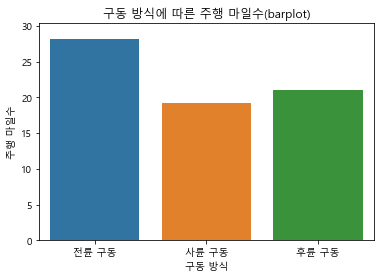

In [32]:
plt.figure()
ax = sns.barplot(x="drv", y="hwy", data=mpg, errwidth=0)   
ax.set_title('구동 방식에 따른 주행 마일수(barplot)')
ax.set_xlabel('구동 방식')    
ax.set_ylabel('주행 마일수')
# 막대의 y값은 데이터 평균에 해당된다. 중요!

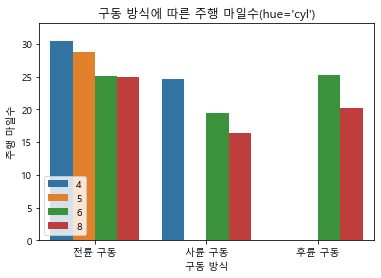

In [33]:
# 매개변수 hue 옵션 추가: 실린더의 옵션 별로 나눠서 막대 만듦

plt.figure()
ax = sns.barplot(x='drv', y='hwy', hue='cyl', data=mpg, errwidth=0)   
ax.set_title("구동 방식에 따른 주행 마일수(hue='cyl')")
ax.set_xlabel('구동 방식')    
ax.set_ylabel('주행 마일수')
plt.legend(loc=3)
# 막대의 y값은 데이터 평균에 해당된다. 중요!

###  구동 방식에 따른 주행 마일수(boxplot 상자수염그래프) 

In [34]:
print('구동 방식에 따른 주행 마일수의 통계치 정보')
mygrouping = mpg.groupby('drv')['hwy']
print(mygrouping.describe())

구동 방식에 따른 주행 마일수의 통계치 정보
       count       mean       std   min   25%   50%   75%   max
drv                                                            
사륜 구동  103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
전륜 구동  106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
후륜 구동   25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0


Text(0, 0.5, '주행 마일수')

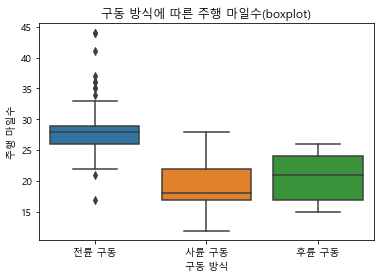

In [35]:
plt.figure()
ax = sns.boxplot(x='drv', y='hwy', data=mpg)   
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

Text(0, 0.5, '주행 마일수')

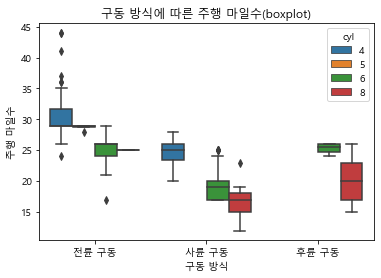

In [36]:
#실린더 수를 hue로 설정

plt.figure()
ax = sns.boxplot(x='drv', y='hwy', hue='cyl', data=mpg)   
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

## 구동 방식에 따른 주행 마일수(violinplot)

Text(0, 0.5, '주행 마일수')

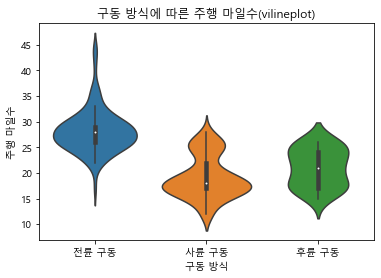

In [37]:
plt.figure()
ax = sns.violinplot(x='drv', y='hwy', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(vilineplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

Text(0, 0.5, '주행 마일수')

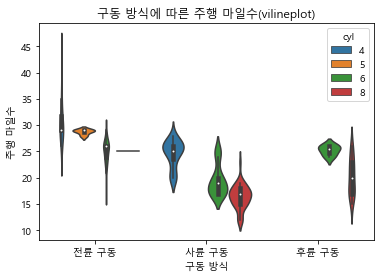

In [38]:
# hue 옵션 추가

plt.figure()
ax = sns.violinplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(vilineplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

## 구동 방식에 따른 주행 마일수(stripplot)

Text(0, 0.5, '주행 마일수')

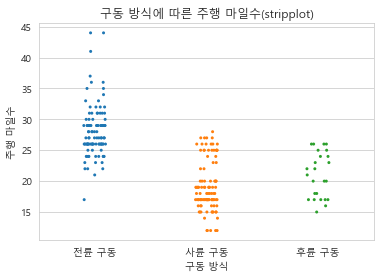

In [55]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', data=mpg, jitter=True, size=STRIP_SIZE)   # jitter=False 도 해보기
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

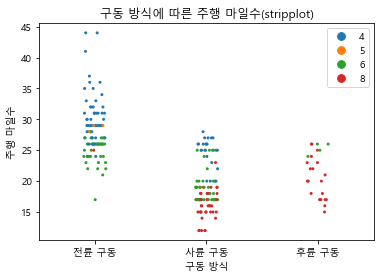

In [40]:
# hue 옵션 추가

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
plt.legend(loc=1)

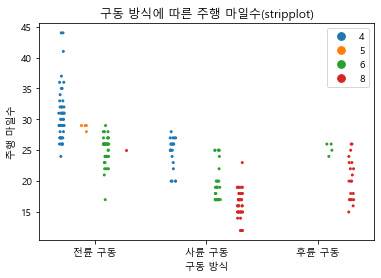

In [41]:
# dodge=True : hue 매개변수에 의해 지정된 값들이 분리되어 표현

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl', data=mpg, jitter=True, dodge=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
plt.legend(loc=1)

## 구동 방식에 따른 주행 마일수(swarmplot)  :stripplot 과 유사

C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

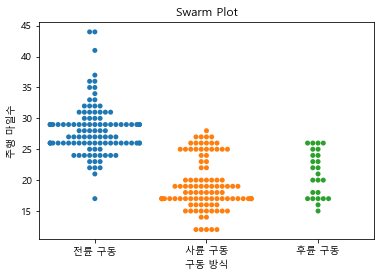

In [42]:
plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', data=mpg)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

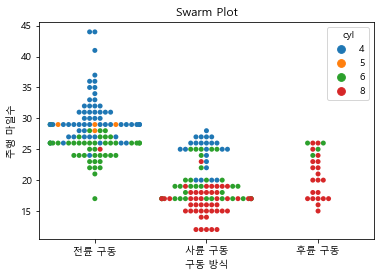

In [43]:
# hue 추가  실린더의 개수인 cyl를 매개변수로 

plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

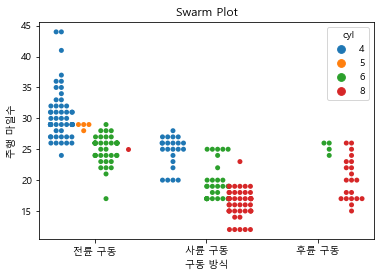

In [44]:
# dodge=True 추가: 실린더의 개수별로 별도의 데이터 분리

plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg, dodge=True)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

## boxplot(상자수염)과 strip plot을 혼합하겨 그래프 그리기

Text(0, 0.5, '구동 방식')

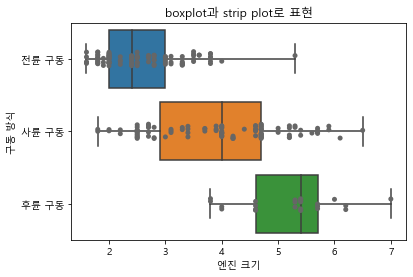

In [45]:
import numpy as np
plt.figure()
sns.boxplot(x='displ', y='drv', data=mpg, whis=np.inf)
ax = sns.stripplot(x='displ', y='drv', data = mpg, jitter=True, color="0.4")
ax.set_title("boxplot과 strip plot로 표현")
ax.set_xlabel('엔진 크기')
ax.set_ylabel('구동 방식')

C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '구동 방식')

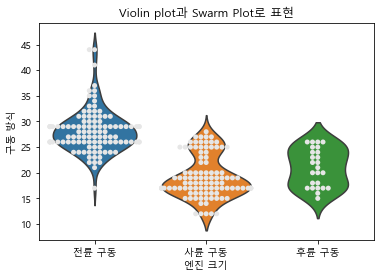

In [46]:
plt.figure()
sns.violinplot(x='drv', y='hwy', data=mpg, inner=None)
ax = sns.swarmplot(x='drv', y='hwy', data=mpg, color="0.9")
ax.set_title("Violin plot과 Swarm Plot로 표현")
ax.set_xlabel('엔진 크기')
ax.set_ylabel('구동 방식')

# 10주차 시작

In [47]:
def sine_plot(mytitle):
    plt.figure()
    plt.rc('font', family='Malgun Gothic')
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * 5) * (7 - i))
    
    plt.title('스타일 : ' + mytitle)

C:\Users\create\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\create\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


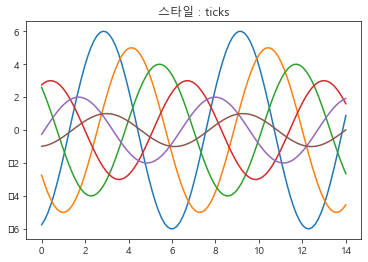

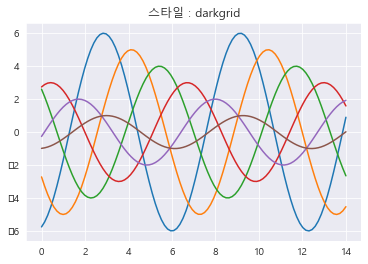

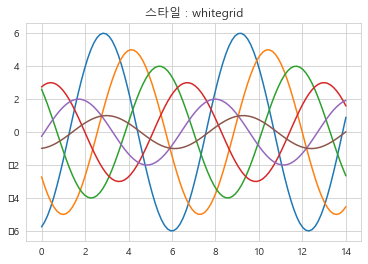

In [48]:
styles = ["ticks", "darkgrid", "whitegrid"]
for one in styles:
    sns.set_style(one)
    sine_plot(one)